In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import pyorc
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from Radar import Radar

In [2]:
# df = pd.read_csv("RSS_Data_October21.txt")
# df

In [3]:
# df.columns

In [4]:
# ds = xr.open_dataset("video_capture_2024-07-01_15-06-19_velocimetry_results.nc")
# video = pyorc.Video("video_capture_2024-07-01_15-06-19.mp4", start_frame=0, end_frame=125)
ds = xr.open_dataset("Videos/video_capture_2024-09-12_13-00-08_results13.nc")
video = pyorc.Video("Videos/video_capture_2024-09-12_13-00-08.mp4", start_frame=0, end_frame=125)
video.camera_config = pyorc.load_camera_config("NEW_cam-config-UWRL.json") # ds.velocimetry.camera_config
radar = Radar()

In [5]:
# ds.ys.as_numpy()

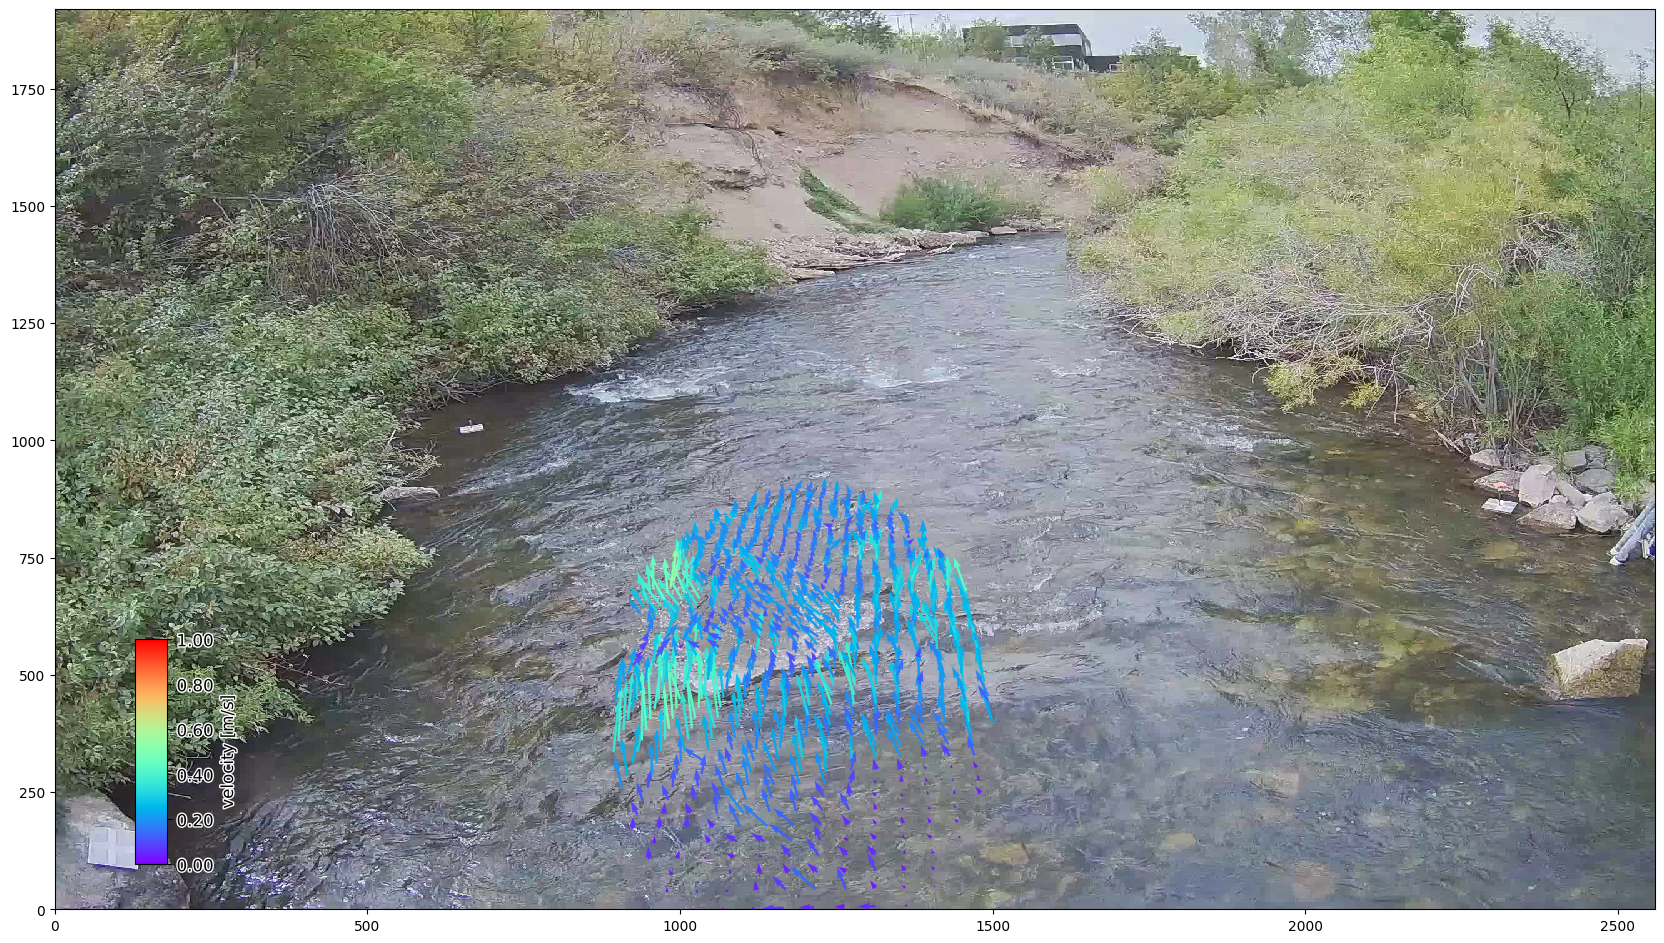

In [6]:
# ds_new = ds.where(radar.filter_point(ds.y, ds.x))

# ds_new = ds.where((ds.x-10)**2 + (ds.y-5)**2 >= 8)

# ds_new = ds.where(radar.filter_point(ds.x, ds.y))
# ds_new = ds.where(radar.filter_point(ds.xs, ds.ys))
# ds_new = ds.where(radar.filter_point(ds.xp, ds.yp))
# ds_new = ds.where(radar.filter_point(ds.ys, ds.xs))
# ds_new = ds.where(radar.filter_point(ds.yp, ds.xp))

# ds_new = ds.where(ds.y < 10)

# ds_new = ds

ds_new = ds.where(radar.filter_point(ds.xs, ds.ys), drop=True)
# ds_new = ds.where(radar.filter_point(ds.xs, ds.ys) | (ds.y < 5))
# ds_new = ds.where(ds.ys < 10)
ds_new = ds_new.mean(dim="time", keep_attrs=True)

ds_new.velocimetry.plot(
    ax=video.get_frames(method="rgb")[0].frames.plot(mode="camera").axes,
    mode="camera",
    alpha=1,
    cmap="rainbow",
    scale=200,
    width=0.0015,
    norm=Normalize(vmin=0., vmax=1.0, clip=False),
    add_colorbar=True
)
plt.show()

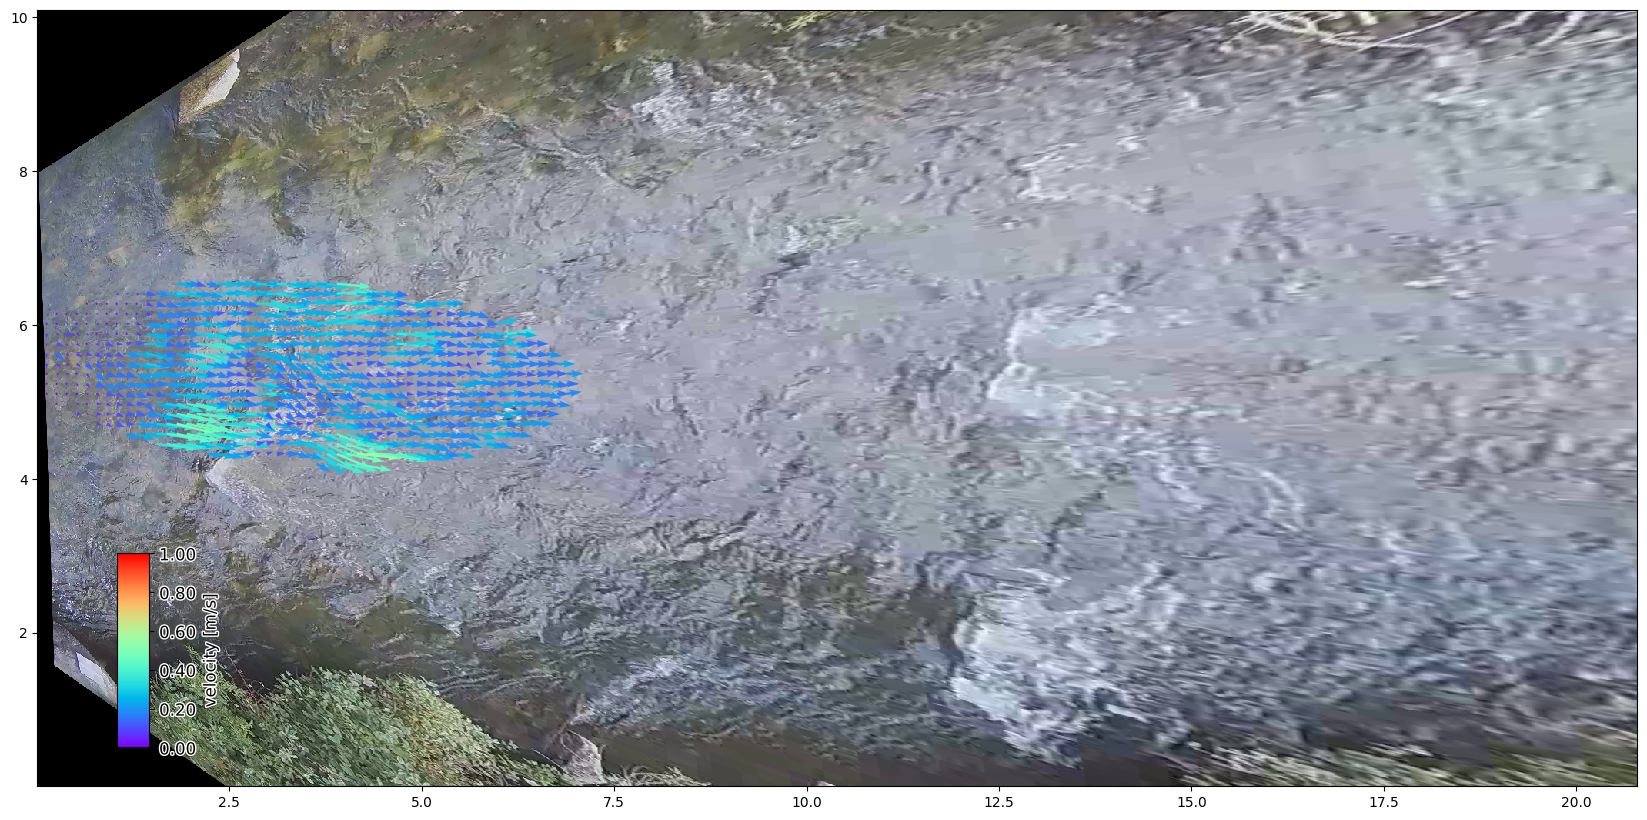

In [7]:
ds_new.velocimetry.plot(
    ax=video.get_frames(method="rgb").frames.project()[0].frames.plot().axes,
    # mode="camera",
    alpha=1,
    cmap="rainbow",
    # cmap="gray",
    scale=20,
    width=0.0015,
    norm=Normalize(vmin=0., vmax=1.0, clip=False),
    add_colorbar=True
)
plt.show()

In [8]:
df = ds_new.to_dataframe().reset_index()
df

y      x  v_x  v_y  s2n  corr           xp          yp         xs  \
0     6.535  0.125  NaN  NaN  NaN   NaN  1558.363892   12.692871   8.637714   
1     6.535  0.255  NaN  NaN  NaN   NaN  1552.497192   51.290894   8.630167   
2     6.535  0.385  NaN  NaN  NaN   NaN  1546.909668   88.051758   8.622620   
3     6.535  0.515  NaN  NaN  NaN   NaN  1541.581909  123.103760   8.615073   
4     6.535  0.645  NaN  NaN  NaN   NaN  1536.496338  156.563232   8.607526   
...     ...    ...  ...  ...  ...   ...          ...         ...        ...   
1002  4.195  6.365  NaN  NaN  NaN   NaN  1026.406006  859.730713  10.611507   
1003  4.195  6.495  NaN  NaN  NaN   NaN  1029.654175  867.940918  10.603960   
1004  4.195  6.625  NaN  NaN  NaN   NaN  1032.830811  875.969971  10.596413   
1005  4.195  6.755  NaN  NaN  NaN   NaN  1035.938110  883.823853  10.588866   
1006  4.195  6.885  NaN  NaN  NaN   NaN  1038.978271  891.508301  10.581319   

            ys  
0     1.874576  
1     2.004356  
2     2.134137  
3     2.263918  
4     2.393699  
...        ...  
1002  8.239899  
1003  8.369680  
1004  8.499460  
1005  8.629241  
1006  8.759022  

[1007 rows x 10 columns]

In [9]:
x_vals = df["xs"].unique()
y_vals = df["ys"].unique()

In [10]:
x_min, x_max = min(x_vals), max(x_vals)
y_min, y_max = min(y_vals), max(y_vals)

In [11]:
x_max, x_min, y_max, y_min

(10.973767564132473, 8.245265278171022, 8.759021894252932, 1.8745755378813653)

In [12]:
abs(9.592 - x_max), abs(9.592 - x_min)

(1.3817675641324723, 1.3467347218289785)